In [1]:
%load_ext autoreload
import sys
sys.path.append("..")

In [2]:
%matplotlib inline

In [53]:
%autoreload

import matplotlib
matplotlib.rc_file('matplotlibrc')
import matplotlib.pyplot as plt

import numpy as np
import pickle

import physics as phys

In [6]:
(m_m_arr, Q_arr, rs_vec, soln_arr_no_Vrel) = pickle.load(
    open('/tigress/hongwanl/millicharged_DM_with_bath/f_1e-4_m_C_1e8.p','rb')
)
(m_m_arr, Q_arr, rs_vec, soln_arr_with_Vrel) = pickle.load(
    open('/tigress/hongwanl/millicharged_DM_with_bath/f_1e-4_m_C_1e8_Vrel_29e5.p','rb')
)

In [33]:
frac_diff = soln_arr_with_Vrel[:,:,-8,0]/soln_arr_no_Vrel[:,:,-8,0] - 1.

# Zero out small differences. 
frac_diff[np.abs(frac_diff) < 1e-2] = 1e-2

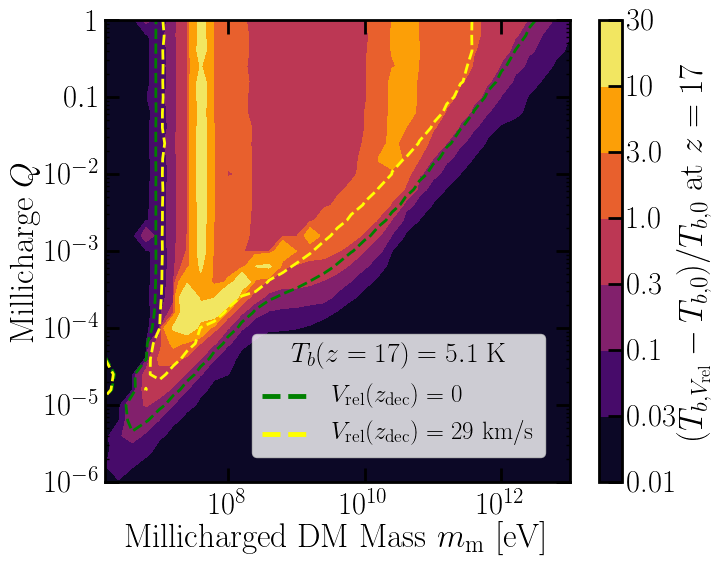

In [89]:
plt.figure(figsize=[7.5, 6])

plt.loglog()

import matplotlib.colors as colors

levels = [1e-2, 3e-2, 0.1, 0.3, 1, 3, 10, 30]

plt.contourf(
    m_m_arr, Q_arr, np.transpose(frac_diff),
    levels=levels, 
    norm=colors.LogNorm(),
    cmap='inferno'
)

cbar = plt.colorbar()
cbar.ax.set_yticklabels(['0.01', '0.03', '0.1', '0.3', '1.0', '3.0', '10', '30'])
cbar.ax.set_ylabel(r'$(T_{b,V_\mathrm{rel}} - T_{b,0})/ T_{b,0}$ at $z = 17$')

plt.contour(
    m_m_arr, Q_arr, np.transpose(soln_arr_no_Vrel[:,:,-8,0]/phys.kB),
    levels=[5.1], linestyles='--', colors='g', linewidths=2
)


plt.contour(
    m_m_arr, Q_arr, np.transpose(soln_arr_with_Vrel[:,:,-8,0]/phys.kB),
    levels=[5.1], linestyles='--', colors='yellow', linewidths=2
)

plt.xlabel('Millicharged DM Mass $m_\mathrm{m}$ [eV]')
plt.ylabel('Millicharge $Q$')

import matplotlib.lines as mlines

plt.legend(
    handles=[
        mlines.Line2D([], [], color='g', linestyle='--'),
        mlines.Line2D([], [], color='yellow', linestyle='--')
    ], 
    title = r'$T_b(z = 17) = 5.1$ K',
    labels=[r'$V_\mathrm{rel}(z_\mathrm{dec}) = $ 0', r'$V_\mathrm{rel}(z_\mathrm{dec}) = $ 29 km/s'],
    loc='lower right'
)